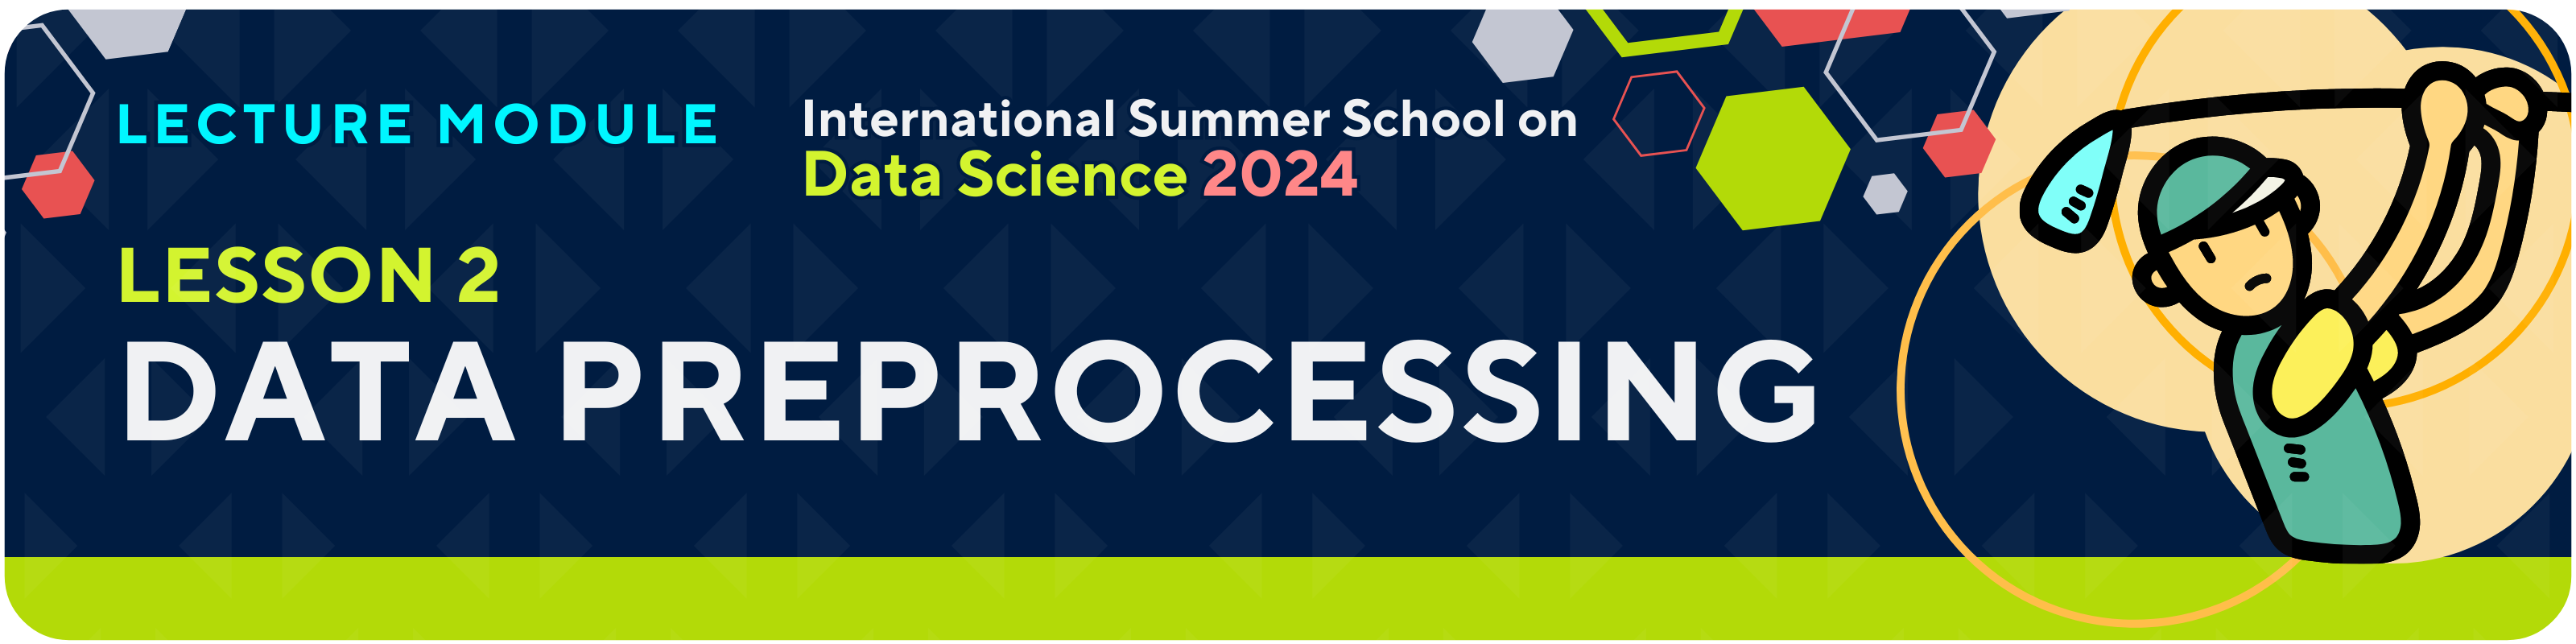

<div class='markdown-google-sans'>

## **2.1**<font color="#B3D500">   ▝</font><font color="#707DA0">▖   </font>**Intro to Data Preprocessing**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Data Preprocessing**
</div>

<img src="https://i.imgur.com/d7cWDvt.png" width=700 />


<img src="https://i.imgur.com/FL6IOhC.png" width=700 />


<img src="https://i.imgur.com/L2rNqnF.png" width=700 />


<img src="https://i.imgur.com/Xa0M7q5.png" width=700 />


<img src="https://i.imgur.com/aTXhMd9.png" width=700 />



In [ ]:
df = pd.read_csv("https://www.dropbox.com/scl/fi/blwog1l73yxojh071rymj/golf_dataset_mini_unprocessed.csv?rlkey=bgsujeypkxt5i8ylc74i618fq&dl=0&raw=1")
df_aqi = pd.read_csv("https://www.dropbox.com/scl/fi/9xtm4zox3wtwld2v6vzn3/golf_dataset_mini_dirty.csv?rlkey=8t0a2hqdjumlmftsj703iuavj&dl=0&raw=1")
df

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,0,0
1,sunny,NaN,90.0,1,0
2,overcast,83.0,78.0,0,1
3,rain,70.0,96.0,0,1
4,rain,68.0,80.0,0,1
5,rain,65.0,70.0,1,0
6,overcast,64.0,65.0,1,1
7,sunny,72.0,95.0,0,0
8,sunny,69.0,70.0,0,1
9,rain,75.0,10.0,0,1


<div class='markdown-google-sans'>

### **<font color=#819A00> Data Cleaning**
</div>

<img src="https://i.imgur.com/JTEnBsV.png" width=700 />


<img src="https://i.imgur.com/uecrVEG.png" width=700 />




<div class='markdown-google-sans'>

### **<font color=#819A00> Data Cleaning**
</div>

<img src="https://i.imgur.com/JTEnBsV.png" width=700 />

<img src="https://i.imgur.com/uecrVEG.png" width=700 />



In [ ]:
# Drop rows with missing values in the "Outlook" column
df.dropna(subset=['Outlook'], inplace=True)

# Calculate the mean of the "Temperature" column
temperature_mean = df['Temperature'].mean()

# Fill missing values in the "Temperature" column with the mean
df['Temperature'].fillna(temperature_mean, inplace=True)

df[['Outlook', 'Temperature']]

,Outlook,Temperature
0,sunny,85.00
1,sunny,73.25
2,overcast,83.00
3,rain,70.00
4,rain,68.00
5,rain,65.00
6,overcast,64.00
7,sunny,72.00
8,sunny,69.00
9,rain,75.00



<img src="https://i.imgur.com/9K2OT76.png" width="750" />

In [ ]:
# Calculate z-scores for each group
df['Humidity_zscore'] = df.groupby('Outlook')['Humidity'].transform(lambda x: (x - x.mean()) / x.std())

# Replace outliers with NaN based on z-score threshold (e.g., ±2)
df['Humidity'] = df['Humidity'].where(df['Humidity_zscore'].abs() <= 2)

# Replace NaN values with the mean of each group
df['Humidity'] = df.groupby('Outlook')['Humidity'].transform(lambda x: x.fillna(x.mean()))

# Drop the z-score column as it's no longer needed
df.drop(columns=['Humidity_zscore'], inplace=True)

df[['Outlook', 'Temperature', 'Humidity']]

,Outlook,Temperature,Humidity
0,sunny,85.00,85.0
1,sunny,73.25,90.0
2,overcast,83.00,78.0
3,rain,70.00,96.0
4,rain,68.00,80.0
5,rain,65.00,70.0
6,overcast,64.00,65.0
7,sunny,72.00,95.0
8,sunny,69.00,70.0
9,rain,75.00,10.0


<div class='markdown-google-sans'>

### **<font color=#819A00> Data Structuring**
</div>


<img src="https://i.imgur.com/6AS53hE.png" width=700 />


<img src="https://i.imgur.com/WO1izJ2.png" width=700 />



In [ ]:
df.insert(len(df.columns) - 1, 'AQI', df_aqi)

df

,Outlook,Temperature,Humidity,Wind,AQI,Play
0,sunny,85.00,85.0,0,85.0,0
1,sunny,73.25,90.0,1,85.0,0
2,overcast,83.00,78.0,0,80.5,1
3,rain,70.00,96.0,0,83.0,1
4,rain,68.00,80.0,0,74.0,1
5,rain,65.00,70.0,1,67.5,0
6,overcast,64.00,65.0,1,64.5,1
7,sunny,72.00,95.0,0,83.5,0
8,sunny,69.00,70.0,0,69.5,1
9,rain,75.00,10.0,0,77.5,1


<div class='markdown-google-sans'>

### **<font color=#819A00> Data Transformation**
</div>


<img src="https://i.imgur.com/kMhlLIf.png" width=700 />


<img src="https://i.imgur.com/jjYDMnc.png" width=700 />



In [ ]:
# Convert the 'Outlook' column into dummy variables
outlook_dummies = pd.get_dummies(df['Outlook'])

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, outlook_dummies], axis=1)

outlook_dummies

,overcast,rain,sunny
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,1,0
5,0,1,0
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0



<img src="https://i.imgur.com/P9GzWSq.png" width=700 />



In [ ]:
# Define the bin edges based on the specified interval
bins = [0, 75, 86, 100]
labels = ['Low', 'Medium', 'High']

# Bin the 'Humidity' column into categories
df['Humidity_bin'] = pd.cut(df['Humidity'], bins=bins, labels=labels, include_lowest=True)

df['Humidity_bin']

0     Medium
1       High
2     Medium
3       High
4     Medium
5        Low
6        Low
7       High
8        Low
9        Low
10       Low
11      High
12       Low
Name: Humidity_bin, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


<img src="https://i.imgur.com/XVHb2Ep.png" width=700 />



In [ ]:
# Calculate the mean and standard deviation of the 'Temperature' column
temp_mean = df['Temperature'].mean()
temp_std = df['Temperature'].std()

# Apply z-score normalization to the 'Temperature' column
df['Temperature_scaled'] = ((df['Temperature'] - temp_mean) / temp_std).round(2)

df[['Temperature','Temperature_scaled']]

,Temperature,Temperature_scaled
0,85.00,1.80
1,73.25,0.00
2,83.00,1.49
3,70.00,-0.50
4,68.00,-0.80
5,65.00,-1.26
6,64.00,-1.42
7,72.00,-0.19
8,69.00,-0.65
9,75.00,0.27


<div class='markdown-google-sans'>

### **<font color=#819A00> Feature Manipulation**
</div>

<img src="https://i.imgur.com/0aKmshH.png" width=700 />


<img src="https://i.imgur.com/6TjaSUd.png" width=700 />



In [ ]:
df['FeelLike_Temperature'] = -2 + df['Temperature'] + 0.04*df['Humidity']

df['FeelLike_Temperature']

0     86.40
1     74.85
2     84.12
3     71.84
4     69.20
5     65.80
6     64.60
7     73.80
8     69.80
9     73.40
10    75.80
11    73.60
12    82.00
Name: FeelLike_Temperature, dtype: float64


<img src="https://i.imgur.com/cWRzq8x.png" width=700 />



In [ ]:
to_drop_columns = ['Outlook', 'overcast', 'Humidity', 'Temperature', 'Humidity', 'Humidity_bin']
df.drop(columns=to_drop_columns, inplace=True)

df

,Wind,AQI,Play,rain,sunny,Temperature_scaled,FeelLike_Temperature
0,0,85.0,0,0,1,1.80,86.40
1,1,85.0,0,0,1,0.00,74.85
2,0,80.5,1,0,0,1.49,84.12
3,0,83.0,1,1,0,-0.50,71.84
4,0,74.0,1,1,0,-0.80,69.20
5,1,67.5,0,1,0,-1.26,65.80
6,1,64.5,1,0,0,-1.42,64.60
7,0,83.5,0,0,1,-0.19,73.80
8,0,69.5,1,0,1,-0.65,69.80
9,0,77.5,1,1,0,0.27,73.40



<img src="https://i.imgur.com/VsZaTm0.png" width=700 />


<div class='markdown-google-sans'>

## **2.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Handling Missing Values**
</div>

<img src="https://i.imgur.com/om4KGrq.png" width=700 />

<img src="https://i.imgur.com/Xnm4YLR.png" width=700 />

<img src="https://i.imgur.com/fkxzzKV.png" width=700 />

<img src="https://i.imgur.com/olNuhpz.png" width=700 />



In [ ]:
import pandas as pd

data_url = "https://www.dropbox.com/scl/fi/xcyzovx4dndo3ps7m3d4t/golf_dataset_the_origin_lotsofmissingvalues.csv?rlkey=oswg2z6wuldsva8tefilsjy2l&dl=0&raw=1"
df_original = pd.read_csv(data_url)
df = pd.read_csv(data_url)

print(df)

     Date  Weekday  Holiday  Temp  Humidity  Wind   Outlook  Crowdedness
0   08-01        0      0.0  25.1      99.0   0.0     rainy         0.14
1   08-02        1      0.0  26.4       NaN   0.0     sunny          NaN
2   08-03        2      0.0   NaN      96.0   0.0     rainy         0.21
3   08-04        3      0.0  24.1      68.0   0.0  overcast         0.68
4   08-05        4      NaN  24.7      98.0   0.0     rainy         0.20
5   08-06        5      0.0  26.5      98.0   0.0       NaN         0.32
6   08-07        6      0.0  27.6      78.0   0.0     rainy         0.72
7   08-08        0      0.0  28.2       NaN   0.0     rainy         0.61
8   08-09        1      0.0  27.1      70.0   0.0  overcast          NaN
9   08-10        2      1.0  26.7      75.0   NaN     sunny         0.54
10  08-11        3      0.0   NaN       NaN   0.0       NaN          NaN
11  08-12        4      NaN  24.3      77.0   0.0  overcast         0.67
12  08-13        5      0.0  23.1      77.0   1.0  

<div class='markdown-google-sans'>

#### **Listwise Imputation**
</div>

<img src="https://i.imgur.com/JAX1lcO.png" width=700 />

In [ ]:
# Step 1: Delete rows with 3 or more missing values
df.dropna(thresh=df.shape[1]-3+1, inplace=True)
print(df)

     Date  Weekday  Holiday  Temp  Humidity  Wind   Outlook  Crowdedness
0   08-01        0      0.0  25.1      99.0   0.0     rainy         0.14
1   08-02        1      0.0  26.4       NaN   0.0     sunny          NaN
2   08-03        2      0.0   NaN      96.0   0.0     rainy         0.21
3   08-04        3      0.0  24.1      68.0   0.0  overcast         0.68
4   08-05        4      NaN  24.7      98.0   0.0     rainy         0.20
5   08-06        5      0.0  26.5      98.0   0.0       NaN         0.32
6   08-07        6      0.0  27.6      78.0   0.0     rainy         0.72
7   08-08        0      0.0  28.2       NaN   0.0     rainy         0.61
8   08-09        1      0.0  27.1      70.0   0.0  overcast          NaN
9   08-10        2      1.0  26.7      75.0   NaN     sunny         0.54
11  08-12        4      NaN  24.3      77.0   0.0  overcast         0.67
12  08-13        5      0.0  23.1      77.0   1.0     sunny         0.66
13  08-14        6      0.0  22.4      89.0   1.0  

<div class='markdown-google-sans'>

### **<font color=#819A00> Imputation Using Mean/Median/Mode**
</div>


<img src="https://i.imgur.com/y9jK0uK.png" width=700 />


In [ ]:
# Step 2: Imputation on Holiday using Mode, and on Humidity using Mean
df['Holiday'].fillna(df['Holiday'].mode()[0], inplace=True)
df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)

print(df)

     Date  Weekday  Holiday  Temp  Humidity  Wind   Outlook  Crowdedness
0   08-01        0      0.0  25.1   99.0000   0.0     rainy         0.14
1   08-02        1      0.0  26.4   82.1875   0.0     sunny          NaN
2   08-03        2      0.0   NaN   96.0000   0.0     rainy         0.21
3   08-04        3      0.0  24.1   68.0000   0.0  overcast         0.68
4   08-05        4      0.0  24.7   98.0000   0.0     rainy         0.20
5   08-06        5      0.0  26.5   98.0000   0.0       NaN         0.32
6   08-07        6      0.0  27.6   78.0000   0.0     rainy         0.72
7   08-08        0      0.0  28.2   82.1875   0.0     rainy         0.61
8   08-09        1      0.0  27.1   70.0000   0.0  overcast          NaN
9   08-10        2      1.0  26.7   75.0000   NaN     sunny         0.54
11  08-12        4      0.0  24.3   77.0000   0.0  overcast         0.67
12  08-13        5      0.0  23.1   77.0000   1.0     sunny         0.66
13  08-14        6      0.0  22.4   89.0000   1.0  

<div class='markdown-google-sans'>

### **<font color=#819A00> Linear Interpolation**
</div>


<img src="https://i.imgur.com/uzKMMZq.png" width=700 />


In [ ]:
# Step 3: Linear Interpolation on Temperature
df['Temp'].interpolate(method='linear', inplace=True)

print(df)

     Date  Weekday  Holiday   Temp  Humidity  Wind   Outlook  Crowdedness
0   08-01        0      0.0  25.10   99.0000   0.0     rainy         0.14
1   08-02        1      0.0  26.40   82.1875   0.0     sunny          NaN
2   08-03        2      0.0  25.25   96.0000   0.0     rainy         0.21
3   08-04        3      0.0  24.10   68.0000   0.0  overcast         0.68
4   08-05        4      0.0  24.70   98.0000   0.0     rainy         0.20
5   08-06        5      0.0  26.50   98.0000   0.0       NaN         0.32
6   08-07        6      0.0  27.60   78.0000   0.0     rainy         0.72
7   08-08        0      0.0  28.20   82.1875   0.0     rainy         0.61
8   08-09        1      0.0  27.10   70.0000   0.0  overcast          NaN
9   08-10        2      1.0  26.70   75.0000   NaN     sunny         0.54
11  08-12        4      0.0  24.30   77.0000   0.0  overcast         0.67
12  08-13        5      0.0  23.10   77.0000   1.0     sunny         0.66
13  08-14        6      0.0  22.40   8

<div class='markdown-google-sans'>

### **<font color=#819A00> Hot-Deck (Forward Fill) Imputation**
</div>


<img src="https://i.imgur.com/kFVmcXr.png" width=700 />

In [ ]:
# Step 4: Hot-Deck Imputation on Outlook
df['Outlook'].fillna(method='ffill', inplace=True)

print(df)

     Date  Weekday  Holiday   Temp  Humidity  Wind   Outlook  Crowdedness
0   08-01        0      0.0  25.10   99.0000   0.0     rainy         0.14
1   08-02        1      0.0  26.40   82.1875   0.0     sunny          NaN
2   08-03        2      0.0  25.25   96.0000   0.0     rainy         0.21
3   08-04        3      0.0  24.10   68.0000   0.0  overcast         0.68
4   08-05        4      0.0  24.70   98.0000   0.0     rainy         0.20
5   08-06        5      0.0  26.50   98.0000   0.0     rainy         0.32
6   08-07        6      0.0  27.60   78.0000   0.0     rainy         0.72
7   08-08        0      0.0  28.20   82.1875   0.0     rainy         0.61
8   08-09        1      0.0  27.10   70.0000   0.0  overcast          NaN
9   08-10        2      1.0  26.70   75.0000   NaN     sunny         0.54
11  08-12        4      0.0  24.30   77.0000   0.0  overcast         0.67
12  08-13        5      0.0  23.10   77.0000   1.0     sunny         0.66
13  08-14        6      0.0  22.40   8

<div class='markdown-google-sans'>

### **<font color=#819A00> Imputation Using Prediction Model**

</div>

<img src="https://i.imgur.com/cH2kQHY.png" width=700 />

In [ ]:
# Step 5: Imputation using kNN on Crowdedness
# Select numerical columns for kNN imputation.
# Other than 'Crowdedness', make sure the other columns missing values are already filled
df_numerical = df[['Holiday', 'Temp', 'Humidity', 'Crowdedness']]

# Perform kNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='distance')
df_imputed = imputer.fit_transform(df_numerical)
df[['Holiday', 'Temp', 'Humidity', 'Crowdedness']] = df_imputed.round(2)

print(df)

     Date  Weekday  Holiday   Temp  Humidity  Wind   Outlook  Crowdedness
0   08-01        0      0.0  25.10     99.00   0.0     rainy         0.14
1   08-02        1      0.0  26.40     82.19   0.0     sunny         0.59
2   08-03        2      0.0  25.25     96.00   0.0     rainy         0.21
3   08-04        3      0.0  24.10     68.00   0.0  overcast         0.68
4   08-05        4      0.0  24.70     98.00   0.0     rainy         0.20
5   08-06        5      0.0  26.50     98.00   0.0     rainy         0.32
6   08-07        6      0.0  27.60     78.00   0.0     rainy         0.72
7   08-08        0      0.0  28.20     82.19   0.0     rainy         0.61
8   08-09        1      0.0  27.10     70.00   0.0  overcast         0.70
9   08-10        2      1.0  26.70     75.00   NaN     sunny         0.54
11  08-12        4      0.0  24.30     77.00   0.0  overcast         0.67
12  08-13        5      0.0  23.10     77.00   1.0     sunny         0.66
13  08-14        6      0.0  22.40    

<div class='markdown-google-sans'>

### **<font color=#819A00> Imputation Using Constant Value**
</div>

<img src="https://i.imgur.com/PK6BBks.png" width=700 />

In [ ]:
# Step 6: Replace missing value on Windy with -99
df['Wind'].fillna(-99, inplace=True)

print(df)

     Date  Weekday  Holiday   Temp  Humidity  Wind   Outlook  Crowdedness
0   08-01        0      0.0  25.10     99.00   0.0     rainy         0.14
1   08-02        1      0.0  26.40     82.19   0.0     sunny         0.59
2   08-03        2      0.0  25.25     96.00   0.0     rainy         0.21
3   08-04        3      0.0  24.10     68.00   0.0  overcast         0.68
4   08-05        4      0.0  24.70     98.00   0.0     rainy         0.20
5   08-06        5      0.0  26.50     98.00   0.0     rainy         0.32
6   08-07        6      0.0  27.60     78.00   0.0     rainy         0.72
7   08-08        0      0.0  28.20     82.19   0.0     rainy         0.61
8   08-09        1      0.0  27.10     70.00   0.0  overcast         0.70
9   08-10        2      1.0  26.70     75.00 -99.0     sunny         0.54
11  08-12        4      0.0  24.30     77.00   0.0  overcast         0.67
12  08-13        5      0.0  23.10     77.00   1.0     sunny         0.66
13  08-14        6      0.0  22.40    

Before and After

In [ ]:
print("Before:")
print(df_original)

print("\n\nAfter:")
print(df)

Before:
     Date  Weekday  Holiday  Temp  Humidity  Wind   Outlook  Crowdedness
0   08-01        0      0.0  25.1      99.0   0.0     rainy         0.14
1   08-02        1      0.0  26.4       NaN   0.0     sunny          NaN
2   08-03        2      0.0   NaN      96.0   0.0     rainy         0.21
3   08-04        3      0.0  24.1      68.0   0.0  overcast         0.68
4   08-05        4      NaN  24.7      98.0   0.0     rainy         0.20
5   08-06        5      0.0  26.5      98.0   0.0       NaN         0.32
6   08-07        6      0.0  27.6      78.0   0.0     rainy         0.72
7   08-08        0      0.0  28.2       NaN   0.0     rainy         0.61
8   08-09        1      0.0  27.1      70.0   0.0  overcast          NaN
9   08-10        2      1.0  26.7      75.0   NaN     sunny         0.54
10  08-11        3      0.0   NaN       NaN   0.0       NaN          NaN
11  08-12        4      NaN  24.3      77.0   0.0  overcast         0.67
12  08-13        5      0.0  23.1      77.0

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Missing Value Imputation Summarized**
</div>

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load the dataset
data_url = "https://www.dropbox.com/scl/fi/xcyzovx4dndo3ps7m3d4t/golf_dataset_the_origin_lotsofmissingvalues.csv?rlkey=oswg2z6wuldsva8tefilsjy2l&dl=0&raw=1"
df_ori = pd.read_csv(data_url)
df = pd.read_csv(data_url)

# Step 1: Delete rows with 3 or more missing values
df.dropna(thresh=df.shape[1]-3+1, inplace=True)

# Step 2: Imputation on Holiday using Mode, and on Humidity using Mean
df['Holiday'].fillna(df['Holiday'].mode()[0], inplace=True)
df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)

# Step 3: Linear Interpolation on Temperature
df['Temp'].interpolate(method='linear', inplace=True)

# Step 4: Hot-Deck Imputation on Outlook
df['Outlook'].fillna(method='ffill', inplace=True)

# Step 5: Imputation using kNN on Crowdedness
# Select numerical columns for kNN imputation.
# Other than 'Crowdedness', make sure the other columns missing values are already filled
df_numerical = df[['Holiday', 'Temp', 'Humidity', 'Crowdedness']]

# Perform kNN imputation
imputer = KNNImputer(n_neighbors=3, weights='distance')
df_imputed = imputer.fit_transform(df_numerical)
df[['Holiday', 'Temp', 'Humidity', 'Crowdedness']] = df_imputed.round(2)

# Step 6: Replace missing value on Windy with -99
df['Wind'].fillna(-99, inplace=True)

# Print the DataFrame after all imputations
print("DataFrame before Imputation:")
print(df_ori)

print("DataFrame after Imputation:")
print(df)

DataFrame before Imputation:
     Date  Weekday  Holiday  Temp  Humidity  Wind   Outlook  Crowdedness
0   08-01        0      0.0  25.1      99.0   0.0     rainy         0.14
1   08-02        1      0.0  26.4       NaN   0.0     sunny          NaN
2   08-03        2      0.0   NaN      96.0   0.0     rainy         0.21
3   08-04        3      0.0  24.1      68.0   0.0  overcast         0.68
4   08-05        4      NaN  24.7      98.0   0.0     rainy         0.20
5   08-06        5      0.0  26.5      98.0   0.0       NaN         0.32
6   08-07        6      0.0  27.6      78.0   0.0     rainy         0.72
7   08-08        0      0.0  28.2       NaN   0.0     rainy         0.61
8   08-09        1      0.0  27.1      70.0   0.0  overcast          NaN
9   08-10        2      1.0  26.7      75.0   NaN     sunny         0.54
10  08-11        3      0.0   NaN       NaN   0.0       NaN          NaN
11  08-12        4      NaN  24.3      77.0   0.0  overcast         0.67
12  08-13        5    

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 02.2**
</div>
Perform at least 3 different imputation methods to the following dataset. Show the final output.

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

golf_dataset = pd.read_csv("https://www.dropbox.com/scl/fi/f72k8sjp5zijm0ymo6ilj/golf_dataset_the_origin_lotsofmissingvalues_practice.csv?rlkey=b1q9r1ai6ukunuxlxhyzuw2ab&dl=0&raw=1")

df = golf_dataset.copy()
print(df)

     Date  Weekday  Holiday  Temp  Humidity  Wind   Outlook  Crowdedness
0   08-21        0      0.0  25.1      99.0   0.0     rainy         0.14
1   08-22        1      0.0  26.4       NaN   1.0     sunny          NaN
2   08-23        2      0.0   NaN      96.0   0.0       NaN         0.21
3   08-24        3      0.0  24.1      68.0   0.0     rainy         0.68
4   08-25        4      NaN  24.7      98.0   0.0       NaN         0.20
5   08-26        5      0.0  26.5      98.0   0.0  overcast         0.32
6   08-27        6      0.0  27.6       NaN   0.0  overcast         0.72
7   08-28        0      0.0  28.2      70.0   0.0       NaN         0.61
8   08-29        1      0.0   NaN      75.0   0.0     rainy          NaN
9   08-30        2      1.0  26.7       NaN   0.0     sunny         0.54
10  08-31        3      0.0   NaN       NaN   0.0     rainy          NaN
11  09-01        4      NaN  24.3      77.0   0.0       NaN         0.67
12  09-02        5      0.0  23.1       NaN   1.0  

In [ ]:
# Answer


<div class='markdown-google-sans'>

## **2.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Encoding Categorical Data**
</div>

<img src="https://i.imgur.com/23b3Uk4.png" width=700 />

<img src="https://i.imgur.com/GLIImHr.png" width=700 />

<img src="https://i.imgur.com/E55jy77.png" width=700 />

<img src="https://i.imgur.com/JQ7wgSI.png" width=700 />

<img src="https://i.imgur.com/XddmCoM.png" width=700 />


<img src="https://i.imgur.com/WbzA12u.png" width=700 />


In [ ]:
import pandas as pd

data_url = "https://www.dropbox.com/scl/fi/c6jpunt6cxw7jks50gna1/golf_dataset_the_origin_allcategorical.csv?rlkey=pmho8eps11a8y5qovoz32bdgi&dl=0&raw=1"
df = pd.read_csv(data_url, index_col=0)

print(df)

      Weekday Temperature Humidity Windy   Outlook Crowdedness
Date                                                          
03-18     Fri         Low      Dry   Yes     sunny        High
03-19     Sat         Low      Dry   Yes     sunny        High
03-20     Sun         Low      Dry   Yes  overcast        High
03-21     Mon         Low    Humid   Yes  overcast        High
03-22     Tue        High      Dry    No     sunny   Very High
03-23     Wed        High    Humid    No     sunny   Very High
03-24     Thu        High    Humid   Yes  overcast      Medium
03-25     Fri         Low      Dry   Yes  overcast      Medium
03-26     Sat    Very Low    Humid    No     sunny   Very High
03-27     Sun         Low    Humid   Yes     sunny   Very High
03-28     Mon         Low    Humid   Yes  overcast      Medium
03-29     Tue         Low    Humid    No  overcast         Low
03-30     Wed    Very Low      Dry    No     sunny        High
03-31     Thu         Low      Dry    No  overcast     

<div class='markdown-google-sans'>

### **<font color=#819A00> One-Hot Encoding**
</div>

<img src="https://i.imgur.com/hOqMlZ4.png" width=700 />

<img src="https://i.imgur.com/IxHE8P9.png" width=700 />


In [ ]:
# One-Hot Encoding on Outlook
df_outlook_one_hot = pd.get_dummies(df['Outlook'], prefix='Outlook', dtype=int)

# One-Hot Encoding on Windy (drop True)
df_windy_one_hot = pd.get_dummies(df['Windy'], prefix='Windy', dtype=int)
df_windy_one_hot.drop('Windy_No', axis=1, inplace=True)

print(df_outlook_one_hot)
print(df_windy_one_hot)

       Outlook_overcast  Outlook_rainy  Outlook_sunny
Date                                                 
03-18                 0              0              1
03-19                 0              0              1
03-20                 1              0              0
03-21                 1              0              0
03-22                 0              0              1
03-23                 0              0              1
03-24                 1              0              0
03-25                 1              0              0
03-26                 0              0              1
03-27                 0              0              1
03-28                 1              0              0
03-29                 1              0              0
03-30                 0              0              1
03-31                 1              0              0
04-01                 1              0              0
04-02                 0              1              0
04-03                 1     

<div class='markdown-google-sans'>

### **<font color=#819A00> Label Encoding**
</div>

<img src="https://i.imgur.com/EdRJdWQ.png" width=700 />



In [ ]:
# Label Encoding on Humidity
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Humidity_Label'] = le.fit_transform(df['Humidity']) + 1  # Add 1 to use 1,2 labels

print(df['Humidity_Label'])

0     1
1     1
2     1
3     2
4     1
5     2
6     2
7     1
8     2
9     2
10    2
11    2
12    1
13    1
14    2
15    2
16    1
Name: Humidity_Label, dtype: int64


<div class='markdown-google-sans'>

### **<font color=#819A00> Ordinal Encoding**
</div>

<img src="https://i.imgur.com/UmFUDWP.png" width=700 />


In [ ]:
# Ordinal Encoding on Crowdedness and Weekday
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Very Low', 'Low', 'Medium', 'High', 'Very High']])
df['Crowdedness_Ordinal'] = oe.fit_transform(df[['Crowdedness']]) + 1  # Add 1 to use 1,2,3,4,5

oe_weekday = OrdinalEncoder(categories=[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']])
df['Weekday_Ordinal'] = oe_weekday.fit_transform(df[['Weekday']])

print(df[['Crowdedness_Ordinal', 'Weekday_Ordinal']])

    Crowdedness_Ordinal  Weekday_Ordinal
0                   4.0              4.0
1                   4.0              5.0
2                   4.0              6.0
3                   4.0              0.0
4                   5.0              1.0
5                   5.0              2.0
6                   3.0              3.0
7                   3.0              4.0
8                   5.0              5.0
9                   5.0              6.0
10                  3.0              0.0
11                  2.0              1.0
12                  4.0              2.0
13                  3.0              3.0
14                  3.0              4.0
15                  1.0              5.0
16                  4.0              6.0


<div class='markdown-google-sans'>

### **<font color=#819A00> Target Encoding**
</div>

<img src="https://i.imgur.com/dC27Ew3.png" width=700 />


In [ ]:
# Installing TargetEncoder
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
# Target Encoding on Outlook (with target variable 'Crowdednes_Ordinal')
from category_encoders import TargetEncoder

te = TargetEncoder()
df['Outlook_Target'] = te.fit_transform(df['Outlook'], df['Crowdedness_Ordinal']).round(2)

print(df[['Outlook','Outlook_Target']])

     Outlook  Outlook_Target
0      sunny            3.85
1      sunny            3.85
2   overcast            3.54
3   overcast            3.54
4      sunny            3.85
5      sunny            3.85
6   overcast            3.54
7   overcast            3.54
8      sunny            3.85
9      sunny            3.85
10  overcast            3.54
11  overcast            3.54
12     sunny            3.85
13  overcast            3.54
14  overcast            3.54
15     rainy            3.30
16  overcast            3.54


<div class='markdown-google-sans'>

### **<font color=#819A00> Frequency Encoding**
</div>

<img src="https://i.imgur.com/Kzd8HwE.png" width=700 />


In [ ]:
# Frequency Encoding on Humidity
humidity_freq = df['Humidity'].value_counts()
df['Humidity_Freq'] = df['Humidity'].map(humidity_freq)

print(df[['Humidity','Humidity_Freq']])

   Humidity  Humidity_Freq
0       Dry              8
1       Dry              8
2       Dry              8
3     Humid              9
4       Dry              8
5     Humid              9
6     Humid              9
7       Dry              8
8     Humid              9
9     Humid              9
10    Humid              9
11    Humid              9
12      Dry              8
13      Dry              8
14    Humid              9
15    Humid              9
16      Dry              8


In [ ]:
# Combine all into a single DataFrame
df_encoded = pd.concat([df, df_outlook_one_hot, df_windy_one_hot], axis=1)
df_encoded = df_encoded.drop(['Weekday', 'Temperature', 'Humidity', 'Windy', 'Outlook', 'Crowdedness'], axis=1)

df_encoded

,Date,Humidity_Label,Crowdedness_Ordinal,Weekday_Ordinal,Outlook_Target,Humidity_Freq,Outlook_overcast,Outlook_rainy,Outlook_sunny,Windy_Yes
0,03-18,1,4.0,4.0,3.85,8,0,0,1,1
1,03-19,1,4.0,5.0,3.85,8,0,0,1,1
2,03-20,1,4.0,6.0,3.54,8,1,0,0,1
3,03-21,2,4.0,0.0,3.54,9,1,0,0,1
4,03-22,1,5.0,1.0,3.85,8,0,0,1,0
5,03-23,2,5.0,2.0,3.85,9,0,0,1,0
6,03-24,2,3.0,3.0,3.54,9,1,0,0,1
7,03-25,1,3.0,4.0,3.54,8,1,0,0,1
8,03-26,2,5.0,5.0,3.85,9,0,0,1,0
9,03-27,2,5.0,6.0,3.85,9,0,0,1,1


<div class='markdown-google-sans'>

### **<font color=#819A00> Cyclic Encoding**
</div>

<img src="https://i.imgur.com/EFKOhiw.png" width=700 />


In [ ]:
# Apply cyclic encoding
import numpy as np

df['Weekday_sin'] = np.sin(2 * np.pi * df['Weekday_Ordinal'] / 7) # 7 days in a week
df['Weekday_cos'] = np.cos(2 * np.pi * df['Weekday_Ordinal'] / 7)

print(df[['Weekday','Weekday_Ordinal','Weekday_sin','Weekday_cos']])

   Weekday  Weekday_Ordinal  Weekday_sin  Weekday_cos
0      Fri              4.0    -0.433884    -0.900969
1      Sat              5.0    -0.974928    -0.222521
2      Sun              6.0    -0.781831     0.623490
3      Mon              0.0     0.000000     1.000000
4      Tue              1.0     0.781831     0.623490
5      Wed              2.0     0.974928    -0.222521
6      Thu              3.0     0.433884    -0.900969
7      Fri              4.0    -0.433884    -0.900969
8      Sat              5.0    -0.974928    -0.222521
9      Sun              6.0    -0.781831     0.623490
10     Mon              0.0     0.000000     1.000000
11     Tue              1.0     0.781831     0.623490
12     Wed              2.0     0.974928    -0.222521
13     Thu              3.0     0.433884    -0.900969
14     Fri              4.0    -0.433884    -0.900969
15     Sat              5.0    -0.974928    -0.222521
16     Sun              6.0    -0.781831     0.623490


<img src="https://i.imgur.com/nYICYNK.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Categorical Encoding Summarized**
</div>

In [ ]:
# Installing TargetEncoder
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from category_encoders import TargetEncoder

# Load the dataset
data_url = "https://www.dropbox.com/scl/fi/c6jpunt6cxw7jks50gna1/golf_dataset_the_origin_allcategorical.csv?rlkey=pmho8eps11a8y5qovoz32bdgi&dl=0&raw=1"
df = pd.read_csv(data_url, index_col=0)

# One-Hot Encoding on Outlook
df_outlook_one_hot = pd.get_dummies(df['Outlook'], prefix='Outlook').astype(int)

# One-Hot Encoding on Windy (drop True)
df_windy_one_hot = pd.get_dummies(df['Windy'], prefix='Windy').astype(int)
df_windy_one_hot.drop('Windy_No', axis=1, inplace=True)

# Label Encoding on Humidity
le = LabelEncoder()
df['Humidity_Label'] = le.fit_transform(df['Humidity']) + 1  # Add 1 to use 1,2 labels

# Ordinal Encoding on Crowdedness and Weekday
oe = OrdinalEncoder(categories=[['Very Low', 'Low', 'Medium', 'High', 'Very High']])
df['Crowdedness_Ordinal'] = oe.fit_transform(df[['Crowdedness']]) + 1  # Add 1 to use 1,2,3,4,5

oe_weekday = OrdinalEncoder(categories=[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']])
df['Weekday_Ordinal'] = oe_weekday.fit_transform(df[['Weekday']])

# Target Encoding on Outlook (with target variable 'Crowdednes_Ordinal')
te = TargetEncoder()
df['Outlook_Target'] = te.fit_transform(df['Outlook'], df['Crowdedness_Ordinal']).round(2)

# Frequency Encoding on Humidity
humidity_freq = df['Humidity'].value_counts()
df['Humidity_Freq'] = df['Humidity'].map(humidity_freq)

# Apply cyclic encoding
df['Weekday_sin'] = np.sin(2 * np.pi * df['Weekday_Ordinal'] / 7)  # 7 days in a week
df['Weekday_cos'] = np.cos(2 * np.pi * df['Weekday_Ordinal'] / 7)

# Drop original columns
df.drop(['Outlook', 'Windy', 'Humidity', 'Crowdedness', 'Weekday'], axis=1, inplace=True)

# Concatenate all encoded data
encoded_df = pd.concat([df_outlook_one_hot, df_windy_one_hot, df], axis=1)

# Print the encoded DataFrame
encoded_df

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Windy_Yes,Temperature,Humidity_Label,Crowdedness_Ordinal,Weekday_Ordinal,Outlook_Target,Humidity_Freq,Weekday_sin,Weekday_cos
Date,,,,,,,,,,,,
03-18,0,0,1,1,Low,1,4.0,4.0,3.85,8,-0.433884,-0.900969
03-19,0,0,1,1,Low,1,4.0,5.0,3.85,8,-0.974928,-0.222521
03-20,1,0,0,1,Low,1,4.0,6.0,3.54,8,-0.781831,0.623490
03-21,1,0,0,1,Low,2,4.0,0.0,3.54,9,0.000000,1.000000
03-22,0,0,1,0,High,1,5.0,1.0,3.85,8,0.781831,0.623490
03-23,0,0,1,0,High,2,5.0,2.0,3.85,9,0.974928,-0.222521
03-24,1,0,0,1,High,2,3.0,3.0,3.54,9,0.433884,-0.900969
03-25,1,0,0,1,Low,1,3.0,4.0,3.54,8,-0.433884,-0.900969
03-26,0,0,1,0,Very Low,2,5.0,5.0,3.85,9,-0.974928,-0.222521


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 02.3**
</div>
Perform at least 3 different encoding methods to the following dataset. Show the final output.

In [ ]:
import pandas as pd

data_url = "https://www.dropbox.com/scl/fi/xffrmjcy5omhfy4h6znkw/golf_dataset_the_origin_allcategorical_practice.csv?rlkey=aoi5ozvok7qa77vrj4mtfcwhx&dl=0&raw=1"
golf_dataset = pd.read_csv(data_url, index_col=0)
df = golf_dataset.copy()

df

,Weekday,Month,Season,Outlook,PlayHour
Date,,,,,
03-18,Fri,March,Spring,sunny,Short
03-19,Sat,March,Spring,heavy rain,Medium
03-20,Sun,March,Spring,very sunny,Long
03-21,Mon,March,Spring,overcast,Short
03-22,Tue,March,Spring,very sunny,Medium
03-23,Wed,March,Spring,heavy rain,Long
03-24,Thu,March,Spring,overcast,Short
03-25,Fri,March,Spring,overcast,Medium
03-26,Sat,March,Spring,very sunny,Long


In [ ]:
# Answer


<div class='markdown-google-sans'>

## **2.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Data Binning**
</div>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_url = "https://www.dropbox.com/scl/fi/6vbo08y6zrsyp1ko4smk7/golf_dataset_the_origin_allnumerical.csv?rlkey=wjjgnmf4brwjdlgamezom6ehj&dl=0&raw=1"
df = pd.read_csv(data_url, index_col=0)

df

,Date,Weekday,Month,Temperature,Humidity,Crowdedness
0,06-16,3,6,19.7,77.0,0.46
1,06-17,4,6,19.5,64.0,0.75
2,06-18,5,6,19.0,58.0,0.76
3,06-19,6,6,19.0,77.0,0.60
4,06-20,0,6,17.8,87.0,0.41
5,06-21,1,6,17.5,79.0,0.45
6,06-22,2,6,17.8,61.0,0.58
7,06-23,3,6,18.1,69.0,0.66
8,06-24,4,6,20.1,52.0,0.72
9,06-25,5,6,21.0,82.0,0.66


<img src="https://i.imgur.com/31IkQL5.png" width=700 />

<img src="https://i.imgur.com/dGPucVd.png" width=700 />

<img src="https://i.imgur.com/TvUPAJo.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Equal-width Binning**
</div>

<img src="https://i.imgur.com/Gwe1vcm.png" width=700 />


In [ ]:
# Equal-width Binning on Temperature
df['Temperature_bins'] = pd.cut(df['Temperature'], bins=4, labels=False)

print(df[['Temperature', 'Temperature_bins']])

    Temperature  Temperature_bins
0          19.7                 1
1          19.5                 0
2          19.0                 0
3          19.0                 0
4          17.8                 0
5          17.5                 0
6          17.8                 0
7          18.1                 0
8          20.1                 1
9          21.0                 1
10         20.7                 1
11         20.7                 1
12         20.0                 1
13         22.6                 2
14         24.9                 3
15         25.9                 3
16         25.5                 3
17         24.1                 3
18         22.4                 2
19         22.2                 2


In [ ]:
# Get the bin edges, ranges, counts
bin_edges = df['Temperature_bins'].value_counts(bins=4, sort=False).index.sort_values().left
bin_ranges = df['Temperature_bins'].value_counts(bins=4, sort=False).index.sort_values().length
bin_counts = df['Temperature_bins'].value_counts(bins=4, sort=False).sort_index().tolist()

print("Bin edges :", bin_edges)
print("Bin ranges:", bin_ranges)
print("Bin counts:", bin_counts)


Bin edges : Index([-0.004, 0.75, 1.5, 2.25], dtype='float64')
Bin ranges: Index([0.754, 0.75, 0.75, 0.75], dtype='float64')
Bin counts: [7, 6, 3, 4]


<div class='markdown-google-sans'>

### **<font color=#819A00> Equal-frequency Binning**
</div>

<img src="https://i.imgur.com/HqF7AIF.png" width=700 />


In [ ]:
# Equal-frequency Binning on Crowdedness
df['Crowdedness_bins'] = pd.qcut(df['Crowdedness'], q=4, labels=False)

print(df[['Crowdedness', 'Crowdedness_bins']])

    Crowdedness  Crowdedness_bins
0          0.46                 1
1          0.75                 3
2          0.76                 3
3          0.60                 2
4          0.41                 0
5          0.45                 1
6          0.58                 2
7          0.66                 2
8          0.72                 3
9          0.66                 2
10         0.79                 3
11         0.37                 0
12         0.77                 3
13         0.46                 1
14         0.16                 0
15         0.55                 1
16         0.40                 0
17         0.67                 2
18         0.38                 0
19         0.50                 1


In [ ]:
# Get the bin edges, ranges, counts
bin_edges = df['Crowdedness_bins'].value_counts(bins=4, sort=False).index.sort_values().left
bin_ranges = df['Crowdedness_bins'].value_counts(bins=4, sort=False).index.sort_values().length
bin_counts = df['Crowdedness_bins'].value_counts(bins=4, sort=False).sort_index().tolist()

print("Bin edges :", bin_edges)
print("Bin ranges:", bin_ranges)
print("Bin counts:", bin_counts)


Bin edges : Index([-0.004, 0.75, 1.5, 2.25], dtype='float64')
Bin ranges: Index([0.754, 0.75, 0.75, 0.75], dtype='float64')
Bin counts: [5, 5, 5, 5]


<div class='markdown-google-sans'>

### **<font color=#819A00> Custom Binning**
</div>

<img src="https://i.imgur.com/ldeXUDX.png" width=700 />


In [ ]:
# Custom Binning on Weekday (binary case)
df['Weekday_bins'] = np.where(df['Weekday'] <= 4, 0, 1)

# Custom Binning on Month (multi-categories case)
bins = [0, 3, 6, 9, 12]
labels = ['Q1', 'Q2', 'Q3', 'Q4']
df['Month_bins'] = pd.cut(df['Month'], bins=bins, labels=labels)

print(df[['Weekday','Weekday_bins','Month','Month_bins']])

    Weekday  Weekday_bins  Month Month_bins
0         3             0      6         Q2
1         4             0      6         Q2
2         5             1      6         Q2
3         6             1      6         Q2
4         0             0      6         Q2
5         1             0      6         Q2
6         2             0      6         Q2
7         3             0      6         Q2
8         4             0      6         Q2
9         5             1      6         Q2
10        6             1      6         Q2
11        0             0      6         Q2
12        1             0      6         Q2
13        2             0      6         Q2
14        3             0      6         Q2
15        4             0      7         Q3
16        5             1      7         Q3
17        6             1      7         Q3
18        0             0      7         Q3
19        1             0      7         Q3


<div class='markdown-google-sans'>

### **<font color=#819A00> Clustering for Binning**
</div>

<img src="https://i.imgur.com/REx4FK5.png" width=700 />


In [ ]:
# k-means binning on Humidity
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10)
df['Humidity_bins'] = kmeans.fit_predict(df[['Humidity']])

print(df[['Humidity', 'Humidity_bins']])

    Humidity  Humidity_bins
0       77.0              2
1       64.0              0
2       58.0              3
3       77.0              2
4       87.0              1
5       79.0              2
6       61.0              0
7       69.0              0
8       52.0              3
9       82.0              1
10      65.0              0
11      85.0              1
12      64.0              0
13      74.0              2
14      91.0              1
15      83.0              1
16      91.0              1
17      73.0              2
18      84.0              1
19      76.0              2


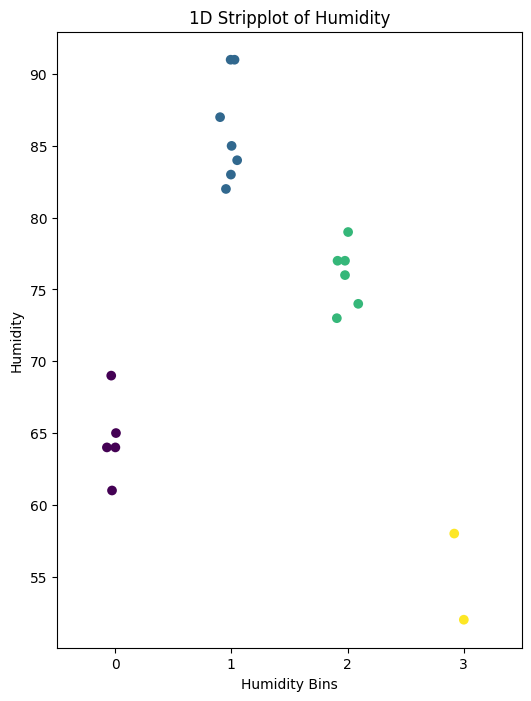

In [ ]:
# (Extra) 1D Plot of Humidity and its bins
plt.figure(figsize=(6, 8))
sns.stripplot(x='Humidity_bins', y='Humidity', data=df,
              palette='viridis', size=7, hue='Humidity_bins', legend=False)
plt.xlabel("Humidity Bins")
plt.ylabel("Humidity")
plt.title("1D Stripplot of Humidity")
plt.show()

In [ ]:
# Combine all into a single DataFrame
df_binned = df.drop(['Weekday', 'Month', 'Temperature', 'Humidity', 'Crowdedness'], axis=1)
print(df_binned)

     Date  Temperature_bins  Crowdedness_bins  Weekday_bins Month_bins  \
0   06-16                 1                 1             0         Q2   
1   06-17                 0                 3             0         Q2   
2   06-18                 0                 3             1         Q2   
3   06-19                 0                 2             1         Q2   
4   06-20                 0                 0             0         Q2   
5   06-21                 0                 1             0         Q2   
6   06-22                 0                 2             0         Q2   
7   06-23                 0                 2             0         Q2   
8   06-24                 1                 3             0         Q2   
9   06-25                 1                 2             1         Q2   
10  06-26                 1                 3             1         Q2   
11  06-27                 1                 0             0         Q2   
12  06-28                 1           

<img src="https://i.imgur.com/7JIy4xT.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Data Binning Summarized**
</div>

In [ ]:
import pandas as pd
import numpy as np

data_url = "https://www.dropbox.com/scl/fi/6vbo08y6zrsyp1ko4smk7/golf_dataset_the_origin_allnumerical.csv?rlkey=wjjgnmf4brwjdlgamezom6ehj&dl=0&raw=1"
df = pd.read_csv(data_url, index_col=0)

# Equal-width Binning on Temperature
df['Temp_bins'] = pd.cut(df['Temperature'], bins=4, labels=False)

# Equal-frequency Binning on Crowdedness
df['Crowdedness_bins'] = pd.qcut(df['Crowdedness'], q=4, labels=False)

# Custom Binning on Weekday (binary case)
df['Weekday_bins'] = np.where(df['Weekday'] <= 4, 0, 1)

# Custom Binning on Month (multi-categories case)
bins = [0, 3, 6, 9, 12]
labels = ['Q1', 'Q2', 'Q3', 'Q4']
df['Month_bins'] = pd.cut(df['Month'], bins=bins, labels=labels)

# k-means binning on Humidity
kmeans = KMeans(n_clusters=4, n_init=10)
df['Humidity_bins'] = kmeans.fit_predict(df[['Humidity']])

print(df[['Temp_bins', 'Crowdedness_bins', 'Weekday_bins', 'Month_bins', 'Humidity_bins']])

       Temp_bins  Crowdedness_bins  Weekday_bins Month_bins  Humidity_bins
Date                                                                      
06-16          1                 1             0         Q2              3
06-17          0                 3             0         Q2              2
06-18          0                 3             1         Q2              0
06-19          0                 2             1         Q2              3
06-20          0                 0             0         Q2              1
06-21          0                 1             0         Q2              3
06-22          0                 2             0         Q2              2
06-23          0                 2             0         Q2              2
06-24          1                 3             0         Q2              0
06-25          1                 2             1         Q2              1
06-26          1                 3             1         Q2              2
06-27          1         

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 02.4**
</div>
Bin at least 3 variables. Show the final output.

In [ ]:
import pandas as pd
import numpy as np

data_url = "https://www.dropbox.com/scl/fi/8oyulxfrgswlyvt6es7dc/golf_dataset_the_origin_allnumerical_practice.csv?rlkey=of57oty9op3l4jv1kk5qj6ebl&dl=0&raw=1"
df = pd.read_csv(data_url, index_col=0)

print(df)

       Weekday  Month  WeekNumber  FeelLikeTemperature  AirQualityIndex
Date                                                                   
10-01        3     10          40                 19.9               75
10-02        4     10          40                 19.7               64
10-03        5     10          40                 18.9               58
10-04        6     10          40                 19.3               77
10-05        0     10          41                 17.9               87
10-06        1     10          41                 17.3               79
10-07        2     10          41                 17.6               61
10-08        3     10          41                 18.0               69
10-09        4     10          41                 20.3               52
10-10        5     10          41                 21.1               82
10-11        6     10          41                 20.8               65
10-12        0     10          42                 20.4          

In [ ]:
# Answer:


<div class='markdown-google-sans'>

## **2.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Scaling and Normalization**
</div>

<img src="https://i.imgur.com/qlJq9CI.png" width=700 />

<img src="https://i.imgur.com/L9IMlxc.png" width=700 />

<img src="https://i.imgur.com/4Msw2re.png" width=700 />

<img src="https://i.imgur.com/2vvLK2F.png" width=700 />


In [ ]:
import pandas as pd

data_url = "https://www.dropbox.com/scl/fi/qcyr9mlx9dm74ck0x8uxq/golf_dataset_the_origin_unscaled.csv?rlkey=wp75i0virzezoyicnwfjr0zr9&dl=0&raw=1"
df_ori = pd.read_csv(data_url)
df = pd.read_csv(data_url)

print(df)

     Date  Temperature  Humidity  Crowdedness  Estimated_Drive_Distance
0   06-16         19.7      77.0           13                     198.5
1   06-17         19.5      64.0           22                     172.0
2   06-18         19.0      58.0           22                     150.0
3   06-19         19.0      77.0           18                     160.5
4   06-20         17.8      87.0           12                     184.5
5   06-21         17.5      79.0           13                     213.0
6   06-22         17.8      61.0           17                     228.5
7   06-23         18.1      69.0           19                     245.5
8   06-24         20.1      52.0           21                     264.0
9   06-25         21.0      82.0           19                     283.5
10  06-26         20.7      65.0           23                     304.5
11  06-27         20.7      85.0           11                     327.0
12  06-28         20.0      64.0           23                   

<div class='markdown-google-sans'>

### **<font color=#819A00> Min-max Scaling**
</div>

<img src="https://i.imgur.com/gfxw9Lr.png" width=700 />


In [ ]:
# Apply Min-Max scaling to Crowdedness
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df['Crowdedness_MinMax'] = min_max_scaler.fit_transform(df[['Crowdedness']]).round(2)

df[['Crowdedness','Crowdedness_MinMax']]

0.47
0.95
0.95
0.74
0.42
0.47
0.68
0.79
0.89
0.79
1.0
0.37
1.0
0.47
0.0
0.63
0.42
0.84
0.37
0.58


<div class='markdown-google-sans'>

### **<font color=#819A00> Standard (z-score) Scaling**
</div>

<img src="https://i.imgur.com/r86ymLs.png" width=700 />


In [ ]:
# Apply Standard Scaling to Temperature
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['Temperature_Standard'] = std_scaler.fit_transform(df[['Temperature']]).round(2)

for value in df['Temperature_Standard']:
    print(value)

-0.48
-0.56
-0.76
-0.76
-1.23
-1.34
-1.23
-1.11
-0.32
0.03
-0.09
-0.09
-0.36
0.66
1.56
1.95
1.79
1.25
0.58
0.5


<div class='markdown-google-sans'>

### **<font color=#819A00> Robust Scaling**
</div>

<img src="https://i.imgur.com/bE9JrWt.png" width=700 />


In [ ]:
# Apply Robust Scaling to Humidity
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
df['Humidity_Robust'] = robust_scaler.fit_transform(df[['Humidity']]).round(2)

for value in df['Humidity_Robust']:
    print(value)

0.03
-0.68
-1.0
0.03
0.57
0.14
-0.84
-0.41
-1.32
0.3
-0.62
0.46
-0.68
-0.14
0.78
0.35
0.78
-0.19
0.41
-0.03


<div class='markdown-google-sans'>

### **<font color=#819A00> Log Transformation**
</div>

<img src="https://i.imgur.com/P21M93l.png" width=700 />


In [ ]:
# Apply Log Transformation to Estimated_Drive_Distance
from math import log
df['Estimated_Drive_Distance_Log'] = np.log(df['Estimated_Drive_Distance']).round(2)

for value in df['Estimated_Drive_Distance_Log']:
    print(value)

5.29
5.15
5.01
5.08
5.22
5.36
5.43
5.5
5.58
5.65
5.72
5.79
5.86
5.93
6.0
6.08
6.15
6.22
6.29
6.37


<div class='markdown-google-sans'>

### **<font color=#819A00> Normalization**
</div>

<img src="https://i.imgur.com/KlmbnzB.png" width=700 />


In [ ]:
# Apply Normalization to all scaled data
from sklearn.preprocessing import normalize
df_scaled = df[['Crowdedness_MinMax', 'Temperature_Standard', 'Humidity_Robust', 'Estimated_Drive_Distance_Log']]
df_normalized = pd.DataFrame(normalize(df_scaled, axis=0), columns=df_scaled.columns).round(2)
df_normalized['Date'] = df['Date']

print(df_normalized)

    Crowdedness_MinMax  Temperature_Standard  Humidity_Robust  \
0                 0.15                 -0.11             0.01   
1                 0.31                 -0.13            -0.25   
2                 0.31                 -0.17            -0.37   
3                 0.24                 -0.17             0.01   
4                 0.14                 -0.27             0.21   
5                 0.15                 -0.30             0.05   
6                 0.22                 -0.27            -0.31   
7                 0.26                 -0.25            -0.15   
8                 0.29                 -0.07            -0.49   
9                 0.26                  0.01             0.11   
10                0.32                 -0.02            -0.23   
11                0.12                 -0.02             0.17   
12                0.32                 -0.08            -0.25   
13                0.15                  0.15            -0.05   
14                0.00   

<img src="https://i.imgur.com/2KcYq1L.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Data Scaling Summarized**
</div>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Load the dataset
data_url = "https://www.dropbox.com/scl/fi/qcyr9mlx9dm74ck0x8uxq/golf_dataset_the_origin_unscaled.csv?rlkey=wp75i0virzezoyicnwfjr0zr9&dl=0&raw=1"
df_ori = pd.read_csv(data_url)
df = pd.read_csv(data_url)

# Apply Min-Max scaling to Crowdedness
min_max_scaler = MinMaxScaler()
df['Crowdedness_MinMax'] = min_max_scaler.fit_transform(df[['Crowdedness']]).round(2)

# Apply Standard Scaling to Temperature
std_scaler = StandardScaler()
df['Temperature_Std'] = std_scaler.fit_transform(df[['Temperature']]).round(2)

# Apply Robust Scaling to Humidity
robust_scaler = RobustScaler()
df['Humidity_Robust'] = robust_scaler.fit_transform(df[['Humidity']]).round(2)

# Apply Log Transformation to Estimated_Drive_Distance
df['Est_Drive_Dist_Log'] = np.log(df['Estimated_Drive_Distance']).round(2)

# Print the scaled DataFrame
print("Original DataFrame:")
print(df_ori)

print("\nScaled DataFrame:")
print(df[['Temperature_Std','Humidity_Robust','Crowdedness_MinMax','Est_Drive_Dist_Log']])

Original DataFrame:
     Date  Temperature  Humidity  Crowdedness  Estimated_Drive_Distance
0   06-16         19.7      77.0           13                     198.5
1   06-17         19.5      64.0           22                     172.0
2   06-18         19.0      58.0           22                     150.0
3   06-19         19.0      77.0           18                     160.5
4   06-20         17.8      87.0           12                     184.5
5   06-21         17.5      79.0           13                     213.0
6   06-22         17.8      61.0           17                     228.5
7   06-23         18.1      69.0           19                     245.5
8   06-24         20.1      52.0           21                     264.0
9   06-25         21.0      82.0           19                     283.5
10  06-26         20.7      65.0           23                     304.5
11  06-27         20.7      85.0           11                     327.0
12  06-28         20.0      64.0           2

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 02.5**
</div>
Scale the data with appropriate scaling techniques. Show the final output.

<font size=1>
<br>Data Info:<br>
Date: "The date when the golf game was played"<br>
HoleCount: "Number of holes played in a game of golf"<br>
SwingSpeed: "Speed of the golf swing in mph"<br>
BallSpeed: "Speed of the golf ball immediately after impact in mph"<br>
DriveYardage: "Distance that the golf ball travels in yards"</font>

In [ ]:
import pandas as pd
import numpy as np

golf_dataset = pd.read_csv("https://www.dropbox.com/scl/fi/r5menwn5uzr87c1v8g4xa/golf_dataset_the_origin_unscaled_practice.csv?rlkey=tazhtuhxpes0jj1o0ebxklps1&dl=0&raw=1")

df = golf_dataset.copy()
print(df)

     Date  HoleCount  SwingSpeed  BallSpeed  DriveYardage
0   06-16         13        95.7      140.0           198
1   06-17         20        96.2      132.0           175
2   06-18         21        94.3      125.0           154
3   06-19         18        95.0      139.0           162
4   06-20         12        92.8      150.0           185
5   06-21         14        91.9      142.0           210
6   06-22         16        92.5      134.0           230
7   06-23         19        93.2      137.0           248
8   06-24         20        98.5      122.0           260
9   06-25         18        99.8      144.0           280
10  06-26         22        98.3      134.0           306
11  06-27         10        98.7      148.0           330
12  06-28         24        97.5      130.0           349
13  06-29         12       100.8      142.0           375
14  06-30          4       104.0      159.0           400
15  07-01         15       105.4      145.0           432
16  07-02     

In [ ]:
# Answer

<div class='markdown-google-sans'>

# <font size=7>**ASSIGNMENT** <font color="#B8D71D">──────────</font></font>
</div>

<div class='markdown-google-sans'>

### 📊　Dataset & Libraries Used
</div>

The following is the dataset that you will use for this exercise. This is a one-year daily dataset about some golf course in a tropical resort (not affected by season and date).

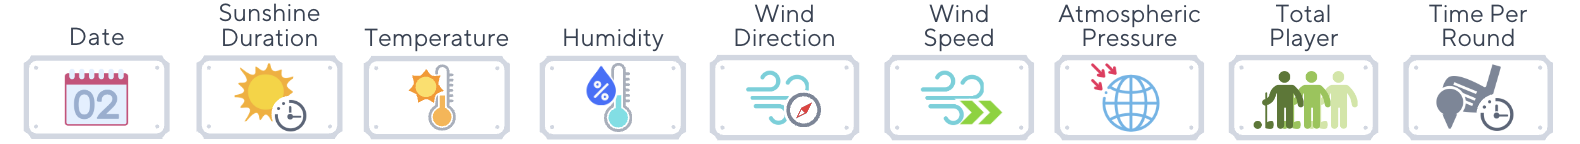


1. **`Date`**: The date of the observation is made.

2. **`SunshineDuration`**: Duration of sunshine in a day (in hour).

3. **`Temperature`**: The average day-time temperature (in Celcius).

4. **`Humidity`**: The average day-time humidity (in %)

5. **`WindDirection`**: The majority of day-time direction of the wind (in degree) (0 = 360 = North, 90 = West, 180 = South, and 270 = East).

5. **`WindSpeed`**: Wind speed during midday (in m/s).

7. **`Pressure`**: Atmospheric pressure (in hPa)

8. **`TotalPlayer`**: Number of player coming to the golf course that day (can be predicted).

9. **`TimePerRound`**: Median of time spent per round among all players that day (in minutes) (can be predicted).

In [ ]:
import pandas as pd

data_url = "https://www.dropbox.com/scl/fi/7qu2is5fgfx3phjzcd2wt/golf_dataset_weather_tropical_1year_numeric_unprocessed.csv?rlkey=9fdftxxwhhp3cg6ktfqlpwufb&dl=0&raw=1"
golf_dataset = pd.read_csv(data_url, index_col=0)
df = golf_dataset.copy()

df

,SunshineDuration,Temperature,Humidity,WindDirection,WindSpeed,Pressure,TotalPlayer,TimePerRound
Date,,,,,,,,
2021-01-01,1.7,28.9,74.0,62.0,2.3,1010.3,66.0,242.0
2021-01-02,11.8,30.5,70.0,350.0,0.1,1013.2,74.0,444.0
2021-01-03,13.1,32.1,80.0,345.3,2.1,1005.5,63.0,306.0
2021-01-04,0.8,26.8,63.0,304.2,2.2,NaN,56.0,293.0
2021-01-05,5.1,28.9,59.0,0.0,6.2,1011.3,70.0,208.0
...,...,...,...,...,...,...,...,...
2021-12-27,2.8,26.2,74.0,318.9,0.7,1008.1,62.0,312.0
2021-12-28,NaN,25.6,67.0,327.8,0.8,1013.7,66.0,290.0
2021-12-29,5.7,29.2,65.0,343.6,1.9,1010.6,84.0,465.0


<div class='markdown-google-sans'>

## **2.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Handling Missing Values**
</div>

The datasets contains a lot of missing values in all columns. Study the dataset description above and decide the strategies to fill all of the missing values. Number of missing values for each columns are given below.

In [ ]:
# Check for missing values per column
missing_values_count = df.isna().sum()

# Print the count of missing values for each column
print("Number of missing values in each column:")
for column, missing_count in missing_values_count.items():
    print(f"{column:16}: {missing_count}")

Number of missing values in each column:
SunshineDuration: 21
Temperature     : 61
Humidity        : 19
WindDirection   : 20
WindSpeed       : 0
Pressure        : 59
TotalPlayer     : 28
TimePerRound    : 14


In [ ]:
# 1. Strategy for General Dataset
# Delete rows with 3 or more missing values
df.dropna(thresh=df.shape[1]-3+1, inplace=True)

df
# Reason for that Strategy (in 5-20 words)
# There are too many missing values in those rows, so it's better to drop them

,SunshineDuration,Temperature,Humidity,WindDirection,WindSpeed,Pressure,TotalPlayer,TimePerRound
Date,,,,,,,,
2021-01-01,1.7,28.9,74.0,62.0,2.3,1010.3,66.0,242.0
2021-01-02,11.8,30.5,70.0,350.0,0.1,1013.2,74.0,444.0
2021-01-03,13.1,32.1,80.0,345.3,2.1,1005.5,63.0,306.0
2021-01-04,0.8,26.8,63.0,304.2,2.2,NaN,56.0,293.0
2021-01-05,5.1,28.9,59.0,0.0,6.2,1011.3,70.0,208.0
...,...,...,...,...,...,...,...,...
2021-12-27,2.8,26.2,74.0,318.9,0.7,1008.1,62.0,312.0
2021-12-28,NaN,25.6,67.0,327.8,0.8,1013.7,66.0,290.0
2021-12-29,5.7,29.2,65.0,343.6,1.9,1010.6,84.0,465.0


In [ ]:
# 2. Strategy for Missing Values in SunshineDuration


# Reason for that Strategy (in 5-20 words)
# ...

In [ ]:
# 3. Strategy for Missing Values in Temperature


# Reason for that Strategy (in 5-20 words)
# ...

In [ ]:
# 4. Strategy for Missing Values in Humidity


# Reason for that Strategy (in 5-20 words)
# ...

In [ ]:
# 5. Strategy for Missing Values in WindDirection


# Reason for that Strategy (in 5-20 words)
# ...

In [ ]:
# 6. Strategy for Missing Values in TotalPlayer


# Reason for that Strategy (in 5-20 words)
# ...

In [ ]:
# 7. Strategy for Missing Values in TimePerRound


# Reason for that Strategy (in 5-20 words)
# ...

In [ ]:
# Final Preprocessed Dataset (it contains all the cleaned data)

#df_cleaned = ...

# Checking March 2021
#print(df_cleaned.iloc[60:90])

# Checking November 2021
#print(df_cleaned.iloc[303:330])

<div class='markdown-google-sans'>

## **2.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Encoding Categorical Data**
</div>

The following dataset are the categorical version of the previous dataset. Decide the strategies to encode those categorical data. The counts of each categories are already given so you can decide the strategies easier.

In [ ]:
import pandas as pd

data_url = "https://www.dropbox.com/scl/fi/x64zu07860sg2s99o97w0/golf_dataset_weather_tropical_1year_categorical_unprocessed-2.csv?rlkey=5f1zljei3zthsnsfgap5331gv&dl=0&raw=1"
golf_dataset = pd.read_csv(data_url, index_col=0)
df = golf_dataset.copy()

print(golf_dataset)

           Month   Outlook Temperature_binned Humidity_binned  \
Date                                                            
2021-01-01   Jan     rainy           Moderate      Very Humid   
2021-01-02   Jan     sunny                Hot        Moderate   
2021-01-03   Jan     sunny                Hot           Humid   
2021-01-04   Jan     rainy               Warm           Humid   
2021-01-05   Jan     sunny                Hot             Dry   
...          ...       ...                ...             ...   
2021-12-27   Dec  overcast               Warm        Moderate   
2021-12-28   Dec  overcast           Moderate           Humid   
2021-12-29   Dec     sunny                Hot        Moderate   
2021-12-30   Dec     rainy           Moderate      Very Humid   
2021-12-31   Dec  overcast               Warm           Humid   

           WindSpeed_binned TotalPlayer_binned  TimePerRound  
Date                                                          
2021-01-01   Very Light Air 

In [ ]:
print('Month Categories:')
print(df['Month'].value_counts())

print('Outlook Categories:')
print(df['Outlook'].value_counts())

print('\nTemperature Categories:')
print(df['Temperature_binned'].value_counts())

print('\nHumidity Categories:')
print(df['Humidity_binned'].value_counts())

print('\nWind Speed Categories:')
print(df['WindSpeed_binned'].value_counts())

print('\nTotal Player Categories:')
print(df['TotalPlayer_binned'].value_counts())

Month Categories:
Jan    31
Mar    31
May    31
Jul    31
Aug    31
Oct    31
Dec    31
Apr    30
Jun    30
Sep    30
Nov    30
Feb    28
Name: Month, dtype: int64
Outlook Categories:
overcast    153
sunny       143
rainy        69
Name: Outlook, dtype: int64

Temperature Categories:
Moderate    127
Warm        109
Hot         105
Cool         24
Name: Temperature_binned, dtype: int64

Humidity Categories:
Humid         149
Moderate      129
Very Humid     69
Dry            18
Name: Humidity_binned, dtype: int64

Wind Speed Categories:
Very Light Air     117
Light Air           91
Gentle Air          59
No Wind             39
Mild Breeze         29
Moderate Breeze     18
Strong Breeze        6
Near Gale            1
Name: WindSpeed_binned, dtype: int64

Total Player Categories:
Many        125
Moderate    121
Very Few     68
Lots         31
Few          16
Extreme       4
Name: TotalPlayer_binned, dtype: int64


In [ ]:
# 1. Strategy for Encoding Outlook
df_outlook_one_hot = pd.get_dummies(df['Outlook'], prefix='Outlook').astype(int)
df = pd.concat([df, df_outlook_one_hot], axis=1)

df

,Month,Outlook,Temperature_binned,Humidity_binned,WindSpeed_binned,TotalPlayer_binned,TimePerRound,Outlook_overcast,Outlook_rainy,Outlook_sunny,Outlook_overcast,Outlook_rainy,Outlook_sunny
Date,,,,,,,,,,,,,
2021-01-01,Jan,rainy,Moderate,Very Humid,Very Light Air,Very Few,256,False,True,False,0,1,0
2021-01-02,Jan,sunny,Hot,Moderate,No Wind,Many,446,False,False,True,0,0,1
2021-01-03,Jan,sunny,Hot,Humid,Light Air,Moderate,294,False,False,True,0,0,1
2021-01-04,Jan,rainy,Warm,Humid,Very Light Air,Very Few,318,False,True,False,0,1,0
2021-01-05,Jan,sunny,Hot,Dry,Mild Breeze,Many,212,False,False,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,Dec,overcast,Warm,Moderate,Very Light Air,Moderate,301,True,False,False,1,0,0
2021-12-28,Dec,overcast,Moderate,Humid,Very Light Air,Many,294,True,False,False,1,0,0
2021-12-29,Dec,sunny,Hot,Moderate,Light Air,Lots,456,False,False,True,0,0,1


In [ ]:
# 2. Strategy for Encoding Month


print(df)

In [ ]:
# 3. Strategy for Encoding Temperature_binned and Humidity_binned


print(df)

In [ ]:
# 4. Strategy for Encoding WindSpeed_binned


print(df)

In [ ]:
# 5. Strategy for Encoding TotalPlayer_binned


print(df)

In [ ]:
# Final Preprocessed Dataset (it only contains 'Date' and all the encoded variables)

#df_encoded = ...
#print(df_encoded)

<div class='markdown-google-sans'>

## **2.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Data Binning**
</div>

From the cleaned data you have made in **2.2**, bin all the weather related parameters (other than Pressure). Choose the binning method that you think is appropriate. (You might look at the categories in **2.3** for inspiration, does not have to be identical.)

In [ ]:
# Getting dataset for binning
# df = df_cleaned[['Date', 'SunshineDuration', 'Temperature', 'Humidity', 'WindDirection', 'WindSpeed']]

In [ ]:
# 1. Strategy for Binning WindDirection
#direction_bins = [-0.1, 45, 135, 215, 305, 360]
#direction_labels = ['North', 'East', 'South', 'West','North']
#df['WindDirection_binned'] = pd.cut(df['WindDirection'], bins=direction_bins, labels=direction_labels, ordered=False)

#print(df[['WindDirection','WindDirection_binned']])

In [ ]:
# 2. Strategy for Binning SunshineDuration

#df['SunshineDuration_binned'] = ...
#print(df[['SunshineDuration', 'SunshineDuration_binned']])

In [ ]:
# 3. Strategy for Binning Temperature

#df['Temperature_binned'] = ...
#print(df[['Temperature', 'Temperature_binned']])

In [ ]:
# 4. Strategy for Binning Humidity

#df['Humidity_binned'] = ...
#print(df[['Humidity', 'Humidity_binned']])

In [ ]:
# 5. Strategy for Binning WindSpeed

#df['WindSpeed_binned'] = ...
#print(df[['WindSpeed', 'WindSpeed_binned']])

In [ ]:
# Final Preprocessed Dataset (it only contains 'Date' and all the binned variables)

#df_binned = ...
#print(df_binned)

<div class='markdown-google-sans'>

## **2.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Scaling and Normalization**
</div>

From the cleaned data you have made in **2.2**, perform scaling on the given columns. Choose the scaling method that you think is appropriate.

In [ ]:
# Getting dataset for scaling
# df = df_cleaned[['Date', 'Temperature', 'Humidity', 'WindSpeed', 'TotalPlayer', 'TimePerRound']]

In [ ]:
# 1. Strategy for Scaling Temperature
#from sklearn.preprocessing import StandardScaler
#std_scaler = StandardScaler()
#df['Temperature_scaled'] = std_scaler.fit_transform(df[['Temperature']]).round(2)

#print(df[['Temperature', 'Temperature_scaled']])

In [ ]:
# 2. Strategy for Scaling Humiditiy

#print(df[['Humidity', 'Humidity_scaled']])

In [ ]:
# 3. Strategy for Scaling WindSpeed

#print(df[['WindSpeed', 'WindSpeed_scaled']])

In [ ]:
# 4. Strategy for Scaling TotalPlayer

#print(df[['TotalPlayer', 'TotalPlayer_scaled']])

In [ ]:
# 5. Strategy for Scaling TimePerRound

#print(df[['TimePerRound', 'TimePerRound_scaled']])

In [ ]:
# Final Preprocessed Dataset (it only contains 'Date' and all the scaled variables)

#df_scaled = ...
#print(df_scaled)